In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use.tail(20)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
104,2020-5-5,3224.0,820.0,4838.0,751.0,36.0,25.0,5020.0,2619.0,6875.0,...,15.0,199.0,41.0,52.0,6.0,174.0,22.0,3.0,293.0,0.0
105,2020-5-6,3392.0,832.0,4997.0,751.0,36.0,25.0,5208.0,2782.0,6894.0,...,15.0,225.0,43.0,58.0,6.0,174.0,25.0,8.0,379.0,0.0
106,2020-5-7,3563.0,842.0,5182.0,752.0,36.0,25.0,5371.0,2884.0,6913.0,...,15.0,231.0,43.0,74.0,6.0,187.0,25.0,8.0,461.0,0.0
107,2020-5-8,3778.0,850.0,5369.0,752.0,43.0,25.0,5611.0,3029.0,6918.0,...,15.0,257.0,43.0,120.0,6.0,208.0,34.0,8.0,522.0,0.0
108,2020-5-9,4033.0,856.0,5558.0,754.0,43.0,25.0,5776.0,3175.0,6939.0,...,15.0,291.0,56.0,120.0,6.0,208.0,34.0,11.0,612.0,0.0
109,2020-5-10,4402.0,868.0,5723.0,755.0,45.0,25.0,6034.0,3313.0,6948.0,...,15.0,307.0,56.0,120.0,6.0,208.0,51.0,11.0,612.0,0.0
110,2020-5-11,4687.0,872.0,5891.0,755.0,45.0,25.0,6278.0,3392.0,6970.0,...,15.0,338.0,57.0,156.0,6.0,208.0,56.0,11.0,661.0,0.0
111,2020-5-12,4963.0,876.0,6067.0,758.0,45.0,25.0,6563.0,3538.0,6980.0,...,15.0,338.0,57.0,194.0,6.0,208.0,65.0,11.0,729.0,0.0
112,2020-5-13,5226.0,880.0,6253.0,760.0,45.0,25.0,6879.0,3718.0,6989.0,...,15.0,387.0,63.0,203.0,6.0,220.0,70.0,11.0,801.0,1.0
113,2020-5-14,5639.0,898.0,6442.0,761.0,48.0,25.0,7134.0,3860.0,7019.0,...,15.0,408.0,63.0,203.0,6.0,235.0,85.0,11.0,907.0,1.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use["Japan"]

0       2.0
1       0.0
2       0.0
3       0.0
4       2.0
       ... 
119     0.0
120    57.0
121    89.0
122    23.0
123    14.0
Name: Japan, Length: 124, dtype: float64

In [11]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [12]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [13]:
growth_data_to_use["Bahrain"].tail(10)

114    1.007853
115    0.425974
116    1.274390
117    1.090909
118    1.526316
119    1.022989
120    0.803371
121    0.839161
122    1.616667
123    0.865979
Name: Bahrain, dtype: float64

In [14]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,2020-1-22,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,2020-1-23,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,2020-1-24,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,2020-1-25,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,2020-1-26,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,4.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2020-5-20,0.846816,15.000000,0.937500,1.0,0.000000,0.0,1.082192,1.055046,2.250000,...,0.0,2.400000,1.0,0.000000,0.0,0.0,0.459459,23.0,0.985507,0.0
120,2020-5-21,1.079268,0.333333,1.127273,0.0,6.000000,0.0,1.367089,1.456522,1.555556,...,0.0,0.416667,1.0,191.000000,0.0,0.0,0.764706,0.0,1.029412,0.0
121,2020-5-22,1.016949,2.400000,1.021505,0.0,0.333333,0.0,1.108025,0.961194,0.285714,...,0.0,1.400000,10.0,0.429319,0.0,0.0,0.923077,44.0,0.957143,1.0
122,2020-5-23,1.448148,0.666667,1.026316,0.0,0.500000,0.0,0.980501,1.161491,3.750000,...,0.0,0.714286,0.0,1.121951,0.0,0.0,0.250000,0.0,0.930348,0.0


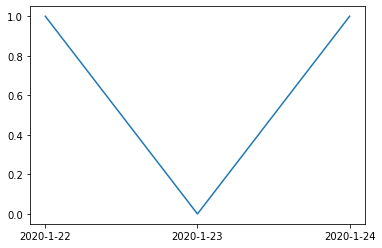

In [15]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [16]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [17]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or (new_cases_to_use[country][len(data)-7] ==0 and new_cases_to_use[country][len(data)-3] ==0 and new_cases_to_use[country][len(data)-1] == 0):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 2000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 2000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif (data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229)) or (new_cases_to_use[country][len(data)-30] >0 and growth_data_to_use[country][len(data)-1]>1.5):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [18]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
187,Lesotho,0.000000,2.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,0.000000,8.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
176,MS Zaandam,0.000000,9.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
182,Western Sahara,3.000000,9.0,COVID-19 Spread is Starting To Get Outta Hands!,1.500000,3.0
141,Suriname,0.000000,11.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
...,...,...,...,...,...,...
138,Spain,1.034335,235772.0,COVID-19 Spread Has Gotten Out of Control!,0.647554,482.0
154,United Kingdom,0.814865,260916.0,COVID-19 Spread Has Gotten Out of Control!,0.856189,2412.0
124,Russia,0.911490,344481.0,COVID-19 Spread Has Gotten Out of Control!,0.986103,8599.0
21,Brazil,0.957899,363211.0,COVID-19 Spread Has Gotten Out of Control!,0.875719,15813.0


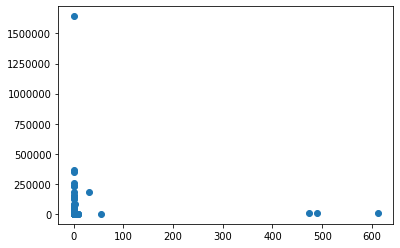

In [19]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [20]:
growth_chart_df.to_csv("growth_category.csv")